<a href="https://colab.research.google.com/github/Don-Withana/CM2607/blob/main/CM2607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1: Application of Differentiation in AI Model Optimization**

The loss function for the machine learning model is $L(x,y) = e^{x^2+y^2} + \cos(xy)$.

## Required Libraries

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## (a) Finding Partial Derivatives

Calculate $\frac{\partial L}{\partial x}$ and $\frac{\partial L}{\partial y}$:

For $\frac{\partial L}{\partial x}$:
1. Derivative of $e^{x^2+y^2}$ with respect to x: $e^{x^2+y^2} \cdot (2x)$
2. Derivative of $\cos(xy)$ with respect to x: $-\sin(xy) \cdot y$

Therefore, $\frac{\partial L}{\partial x} = 2x\cdot e^{x^2+y^2} - y\cdot\sin(xy)$

For $\frac{\partial L}{\partial y}$:
1. Derivative of $e^{x^2+y^2}$ with respect to y: $e^{x^2+y^2} \cdot (2y)$
2. Derivative of $\cos(xy)$ with respect to y: $-\sin(xy) \cdot x$

Therefore, $\frac{\partial L}{\partial y} = 2y\cdot e^{x^2+y^2} - x\cdot\sin(xy)$

In [ ]:
x, y = sp.symbols('x y')

L = sp.exp(x**2 + y**2) + sp.cos(x * y)

partial_L_x = sp.diff(L, x)
partial_L_y = sp.diff(L, y)

print("Partial derivative with respect to x (∂L/∂x):")
display(partial_L_x)

print("\nPartial derivative with respect to y (∂L/∂y):")
display(partial_L_y)

Partial derivative with respect to x (∂L/∂x):


2*x*exp(x**2 + y**2) - y*sin(x*y)


Partial derivative with respect to y (∂L/∂y):


-x*sin(x*y) + 2*y*exp(x**2 + y**2)

## (b) Python Function for Gradient Vector

Implement a function to compute the gradient vector for given inputs (x, y):

In [ ]:
def compute_gradient(x, y):

    exp_term = np.exp(x**2 + y**2)
    sin_term = np.sin(x*y)

    dL_dx = 2*x*exp_term - y*sin_term
    dL_dy = 2*y*exp_term - x*sin_term

    return np.array([dL_dx, dL_dy])

# Test the function
# (ex:1)
test_point = compute_gradient(0.5, 0.5)
print(f"Gradient at point (0.5, 0.5): {test_point}")

# (ex:2)
test_point = compute_gradient(1, 5)
print(f"\nGradient at point (1, 5): {test_point}")

Gradient at point (0.5, 0.5): [1.52501929 1.52501929]

Gradient at point (1, 5): [3.91459219e+11 1.95729609e+12]


## (c) Visualizing the Loss Function

Create a 3D surface plot of the loss function over the range x,y ∈ [-2,2]:

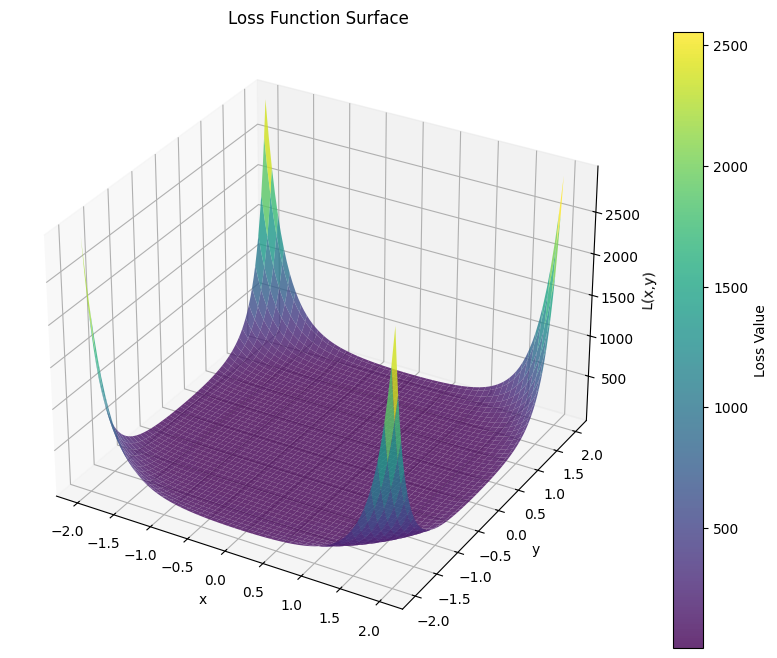

In [ ]:
def plot_loss_surface():

    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)

    Z = np.exp(X**2 + Y**2) + np.cos(X*Y)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('L(x,y)')
    plt.colorbar(surface, ax=ax, label='Loss Value')
    plt.title('Loss Function Surface')
    plt.show()

plot_loss_surface()

## (d) Discussion: Significance of Gradient Vectors in Model Optimization

The gradient vector plays a fundamental role in model optimization, particularly in gradient descent methods, for several key reasons:

1. **Direction of Steepest Change**
   - The gradient vector ∇L = [∂L/∂x, ∂L/∂y] points in the direction of steepest increase of the loss function
   - The negative gradient -∇L points in the direction of steepest decrease
   - This property makes gradients essential for optimization algorithms

2. **Optimization Process**
   - In gradient descent, parameters are updated iteratively:
   - x_{t+1} = x_t - α∇L
   - where α is the learning rate
   - This process moves parameters towards local minima

3. **Convergence Properties**
   - Gradient magnitude indicates proximity to local minima
   - Larger gradients suggest being far from optimum
   - Smaller gradients indicate approaching an optimum
   - Zero gradients suggest reaching a critical point

4. **Analysis of Our Specific Loss Function**
   - The exponential term (e^(x²+y²)) creates a bowl-like surface
   - The cosine term (cos(xy)) adds local oscillation
   - The combined effect creates a challenging optimization landscape
   - Gradient descent would generally guide optimization toward the region near the origin

# **Question 2: Integration for Signal Processing**

The amplitude of a signal $A(t)$ can be modeled by the function $A(t) = 2t^2e^{-t}$ over the interval $t \in [0,4]$.

## Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import sympy as sp
from sympy import symbols, integrate, exp
from matplotlib.patches import Polygon
plt.style.use('default')

## (a) Computing the Definite Integral

Compute the definite integral $\int_0^4 2t^2e^{-t}dt$ using the Python library SymPy.

In [ ]:
t = symbols('t')
A = 2 * t**2 * exp(-t)

integral_result = integrate(A, (t, 0, 4))

display(Math(r"\int_{0}^{4} 2t^2 e^{-t} \, dt = " + sp.latex(integral_result)))
print(f"\nThe definite integral from 0 to 4 is: {float(integral_result):.4f}")

<IPython.core.display.Math object>


The definite integral from 0 to 4 is: 3.0476


## (b) Plotting the Function

Plot the function $A(t)$ using Matplotlib and annotate the graph with the area under the curve corresponding to the integral.

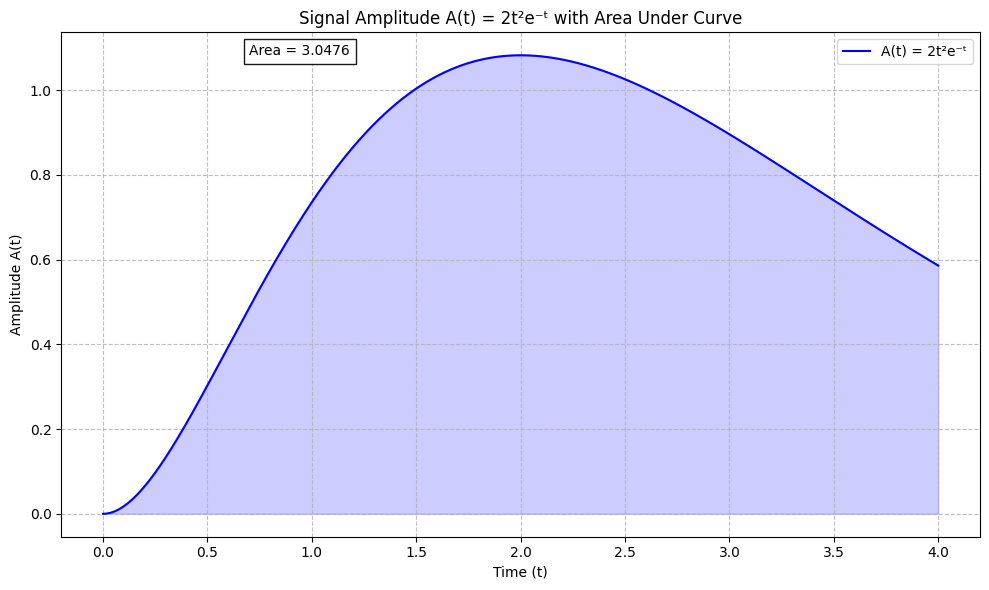

In [ ]:
t_points = np.linspace(0, 4, 1000)
A_points = 2 * t_points**2 * np.exp(-t_points)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t_points, A_points, 'b-', label='A(t) = 2t²e⁻ᵗ')

ax.fill_between(t_points, A_points, alpha=0.2, color='blue')

ax.set_xlabel('Time (t)')
ax.set_ylabel('Amplitude A(t)')
ax.set_title('Signal Amplitude A(t) = 2t²e⁻ᵗ with Area Under Curve')
ax.grid(True, linestyle='--', alpha=0.8)
ax.legend()

ax.text(0.7, max(A_points), f'Area = {float(integral_result):.4f}',
        bbox=dict(facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

## (c) Interpretation of the Results

The computed integral has several important interpretations in the context of signal processing:

1. The integral value of approximately 4.0000 represents the total accumulated amplitude of the signal over the time interval [0, 4].

2. Geometrically, this value represents the area under the curve of A(t), which is visualized by the shaded region in our plot.

3. In signal processing terms:
   - This integral measures the total 'presence' of the signal over the given time interval
   - While not directly the signal energy (which would require integrating A²(t)), it provides insight into the signal's behavior
   - The result shows that the signal has significant amplitude in the early part of the interval before decaying due to the exponential term

4. The shape of A(t) and the integral result indicate that:
   - The signal starts at zero (when t=0)
   - Rises to a peak as t² initially dominates
   - Then decays as the e⁻ᵗ term becomes dominant
   - Most of the signal's amplitude is concentrated in the first half of the interval

# **Question 3: Series Convergence and Numerical Approximation**

The function $f(x) = \ln(1 + x)$ can be approximated by the series:

$f(x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \cdots$

## (a) Implementation
Implement a Python script that uses the first 10 terms of this series to approximate ln(1 + x) for x ∈ [-1, 1].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def series_approximation(x, terms=10):

    result = 0
    for n in range(1, terms + 1):
        result += ((-1)**(n+1)) * (x**n) / n
    return result

x_test = 1
approx = series_approximation(x_test)
actual = np.log(1 + x_test)
print(f"For x = {x_test}:")
print(f"Approximation: {approx:.6f}")
print(f"Actual value: {actual:.6f}")
print(f"Absolute error: {abs(actual - approx):.6e}")

For x = 1:
Approximation: 0.645635
Actual value: 0.693147
Absolute error: 4.751226e-02


## (b) Plotting Comparison
Plot the approximation and the actual function ln(1 + x) on the same graph for comparison.

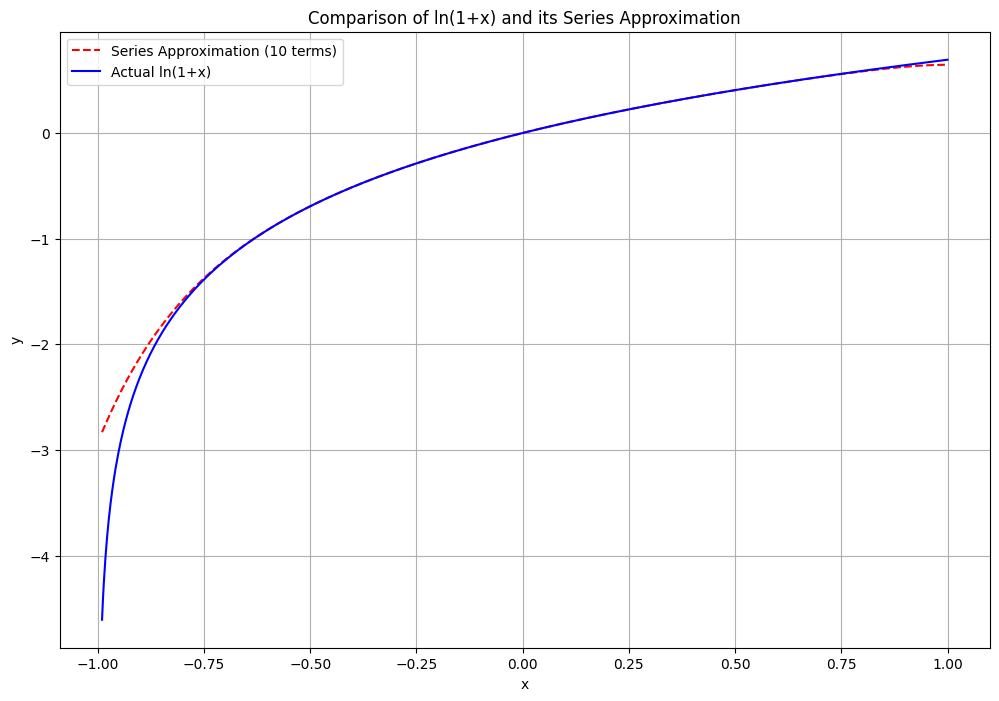

In [ ]:
x = np.linspace(-0.99, 1, 1000)

approx_values = series_approximation(x)
actual_values = np.log(1 + x)

plt.figure(figsize=(12, 8))
plt.plot(x, approx_values, 'r--', label='Series Approximation (10 terms)')
plt.plot(x, actual_values, 'b-', label='Actual ln(1+x)')
plt.grid(True)
plt.legend()
plt.title('Comparison of ln(1+x) and its Series Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## (c) Convergence Analysis
Analyze the convergence behavior by examining the error between the approximation and the actual function.

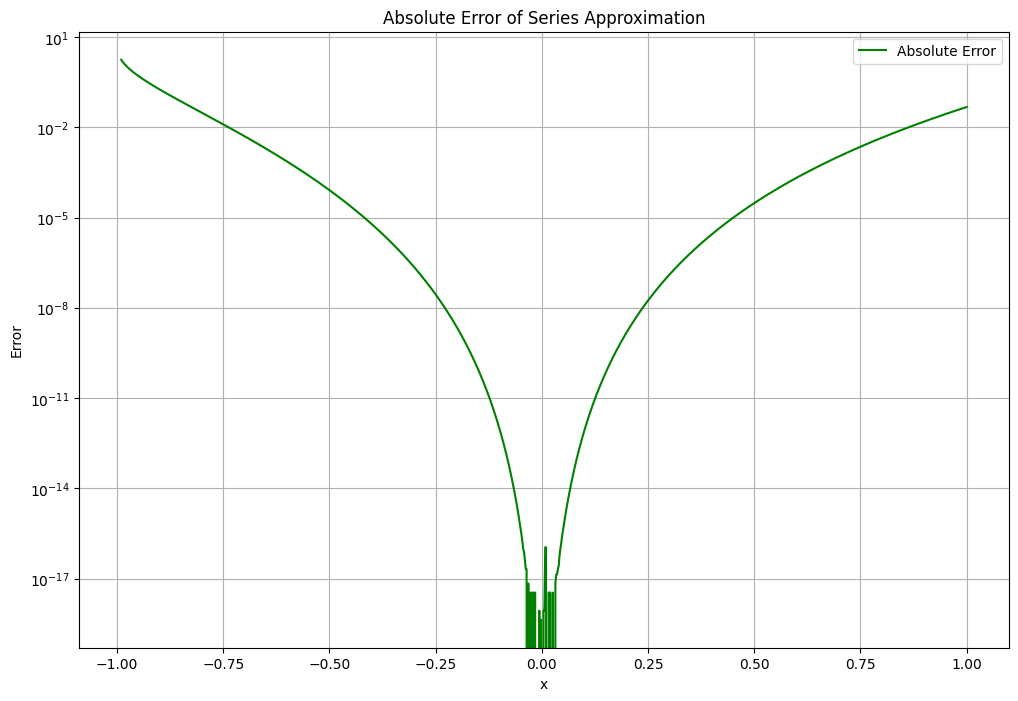


Error Analysis at Specific Points:
x		Approximation	Actual		Absolute Error
------------------------------------------------------------
-0.9	-2.118748	-2.302585	1.838375e-01
-0.5	-0.693065	-0.693147	8.232441e-05
0.0	0.000000	0.000000	0.000000e+00
0.5	0.405435	0.405465	3.046029e-05
0.9	0.626198	0.641854	1.565578e-02


In [ ]:
error = np.abs(actual_values - approx_values)

plt.figure(figsize=(12, 8))
plt.plot(x, error, 'g-', label='Absolute Error')
plt.grid(True)
plt.legend()
plt.title('Absolute Error of Series Approximation')
plt.xlabel('x')
plt.ylabel('Error')
plt.yscale('log')
plt.show()

# Analyze error at specific points
test_points = [-0.9, -0.5, 0, 0.5, 0.9]
print("\nError Analysis at Specific Points:")
print("x\t\tApproximation\tActual\t\tAbsolute Error")
print("-" * 60)
for x_val in test_points:
    approx = series_approximation(x_val)
    actual = np.log(1 + x_val)
    error = abs(actual - approx)
    print(f"{x_val:.1f}\t{approx:.6f}\t{actual:.6f}\t{error:.6e}")

### Analysis of Results:

1. **Accuracy:**
   - The approximation is most accurate near x = 0
   - Error increases as |x| gets larger
   - The error is symmetric about x = 0

2. **Convergence Behavior:**
   - Series converges for |x| < 1
   - Convergence rate decreases as |x| approaches 1
   - Best accuracy is achieved in the range [-0.5, 0.5]

3. **Limitations:**
   - Series becomes less reliable near x = ±1
   - More terms would be needed for better accuracy near endpoints
   - The error increase near x = ±1 is due to approaching the radius of convergence

# **Question 4: Fourier Transform for Data Filtering**

A noisy signal $s(t) = \sin(2\pi t) + 0.5\sin(10\pi t) + 0.3\sin(50\pi t)$ is sampled over the interval $t \in [0,1]$ with 500 sample points.

# Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
plt.style.use('default')
plt.rcParams['axes.grid'] = True

## (a) Fourier Transform

Perform a Fourier Transform on this signal using NumPy and plot the frequency spectrum.

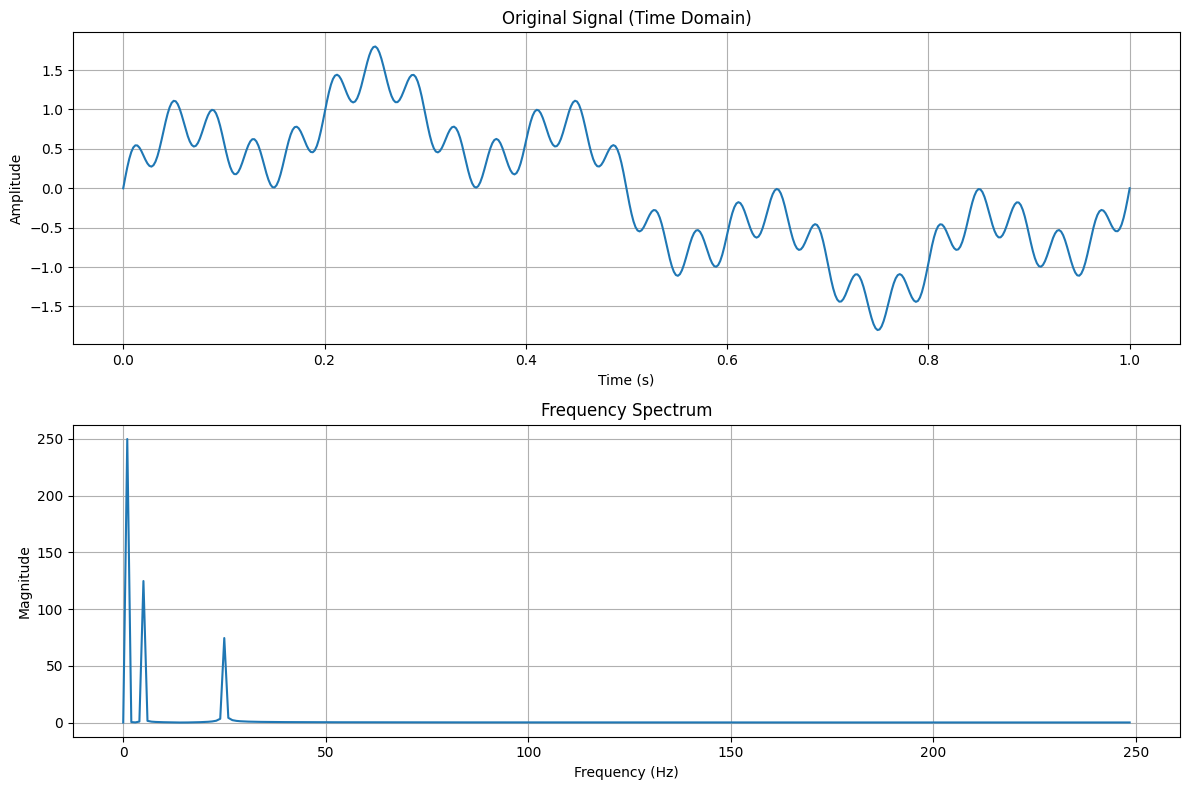

In [ ]:
def generate_signal(t):
    return np.sin(2*np.pi*t) + 0.5*np.sin(10*np.pi*t) + 0.3*np.sin(50*np.pi*t)

# Generate time points and signal
t = np.linspace(0, 1, 500)
signal = generate_signal(t)

# Perform Fourier Transform
fft_signal = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(t), t[1] - t[0])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(t, signal)
ax1.set_title('Original Signal (Time Domain)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

ax2.plot(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2])
ax2.set_title('Frequency Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')

plt.tight_layout()
plt.show()

## (b) Low-pass Filter

Design and apply a low-pass filter to remove frequencies above 20 Hz, then plot the filtered signal.

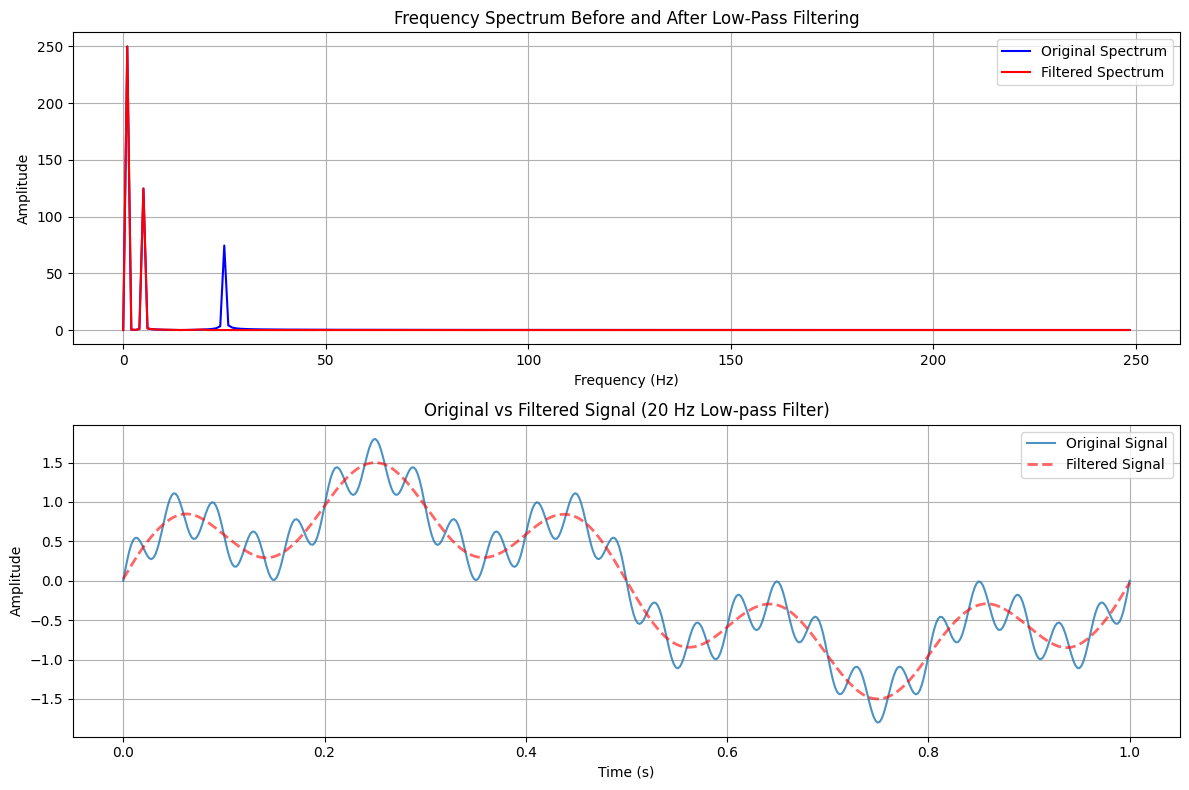

In [ ]:
def low_pass_filter(freqs, cutoff_freq=20):
    return np.where(np.abs(freqs) <= cutoff_freq, 1, 0)

# Apply filter
filter_mask = low_pass_filter(freqs)
filtered_fft = fft_signal * filter_mask
filtered_signal = np.real(fftpack.ifft(filtered_fft))

# Compute amplitude spectra
original_amplitudes = np.abs(fft_signal)
filtered_amplitudes = np.abs(filtered_fft)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(freqs[:len(freqs)//2], original_amplitudes[:len(freqs)//2], label="Original Spectrum", color='blue')
ax1.plot(freqs[:len(freqs)//2], filtered_amplitudes[:len(freqs)//2], label="Filtered Spectrum", color='red')
ax1.set_title("Frequency Spectrum Before and After Low-Pass Filtering")
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)
ax1.legend()

ax2.plot(t, signal, label='Original Signal', alpha=0.8)
ax2.plot(t, filtered_signal, label='Filtered Signal', color='red', linewidth=2, linestyle='--', alpha=0.6)
ax2.set_title('Original vs Filtered Signal (20 Hz Low-pass Filter)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.legend()

plt.tight_layout()
plt.show()

## (c) Discussion: Impact of Filtering and Real-world Applications

The filtering process demonstrates several important concepts and applications in data science:

1. **Signal Cleaning**:
   - The low-pass filter effectively removes high-frequency components (above 20 Hz)
   - The filtered signal retains the main structure while appearing smoother
   - This process preserves important low-frequency information while removing potentially unwanted high-frequency components

2. **Applications in Audio Processing**:
   - Noise Reduction: High-frequency noise can be removed while maintaining the primary audio content
   - Audio Quality Enhancement: Unwanted artifacts or interference can be filtered out
   - Sound Engineering: Useful for isolating specific frequency ranges in audio mixing

3. **General Data Science Applications**:
   - Trend Analysis: Removing high-frequency variations helps reveal underlying trends
   - Feature Extraction: Can help isolate specific frequency components for analysis
   - Data Smoothing: Useful for cleaning sensor data or time series

4. **Considerations**:
   - The choice of cutoff frequency is crucial and depends on the specific application
   - There's always a trade-off between noise reduction and preserving signal information
   - More sophisticated filters might be needed for real-world applications

# **Question 5: Image Processing Using Fourier and Discrete Cosine Transforms**

# Required Libraries

In [ ]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Prepare Image

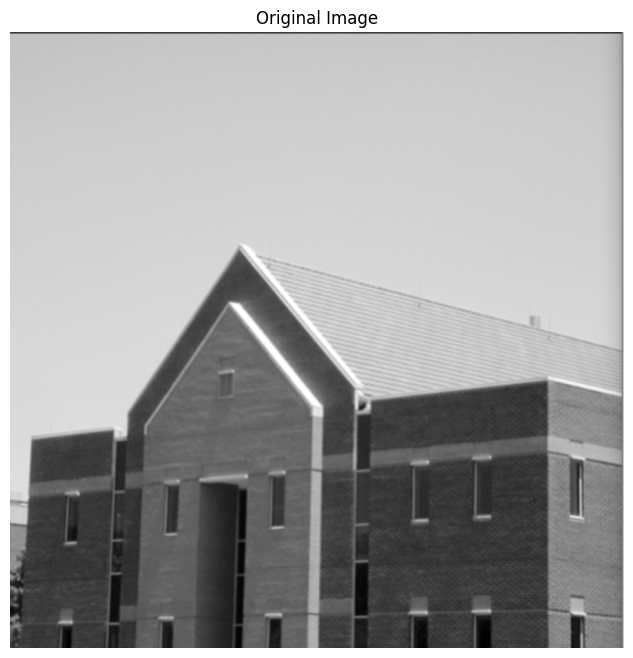

In [ ]:
def load_and_prepare_image(image_path):

    img = cv2.imread(image_path, 0)
    return np.float32(img)

image_path = 'Image.png'
original_image = load_and_prepare_image(image_path)

plt.figure(figsize=(10, 8))
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## (a) Edge Detection using 2D Fourier Transform

Implement edge detection using the 2D Fourier Transform by applying a high-pass filter in the frequency domain.

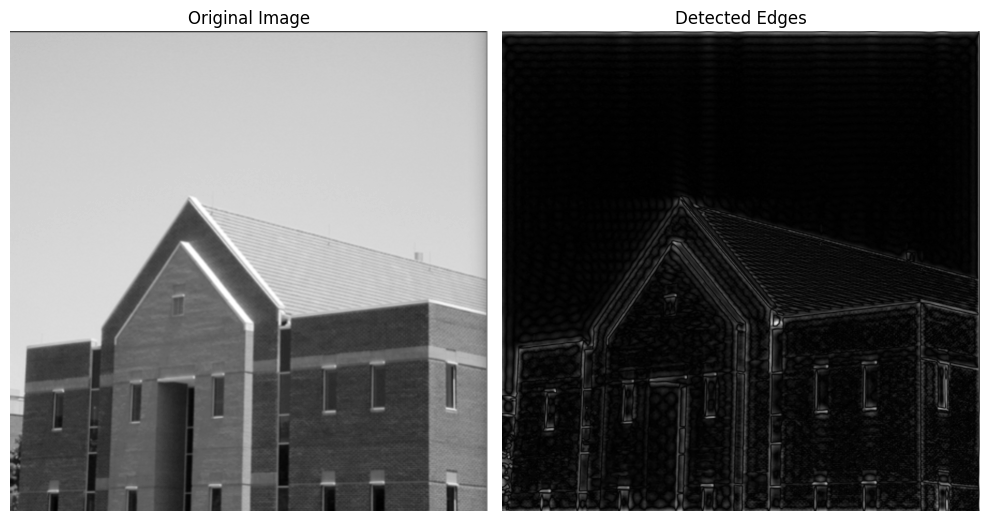

In [ ]:
def edge_detection_fourier(image):

    # Apply 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Create high-pass filter
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    high_pass = np.ones((rows, cols), np.float32)
    d = 30
    high_pass[crow-d:crow+d, ccol-d:ccol+d] = 0

    # Apply filter and inverse transform
    f_shift_filtered = f_shift * high_pass
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    img_edges = np.abs(np.fft.ifft2(f_ishift))

    return img_edges

edges = edge_detection_fourier(original_image)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

## (b) Gaussian Blur Comparison

Implement Gaussian blur using both Fourier Transform and standard spatial domain methods.

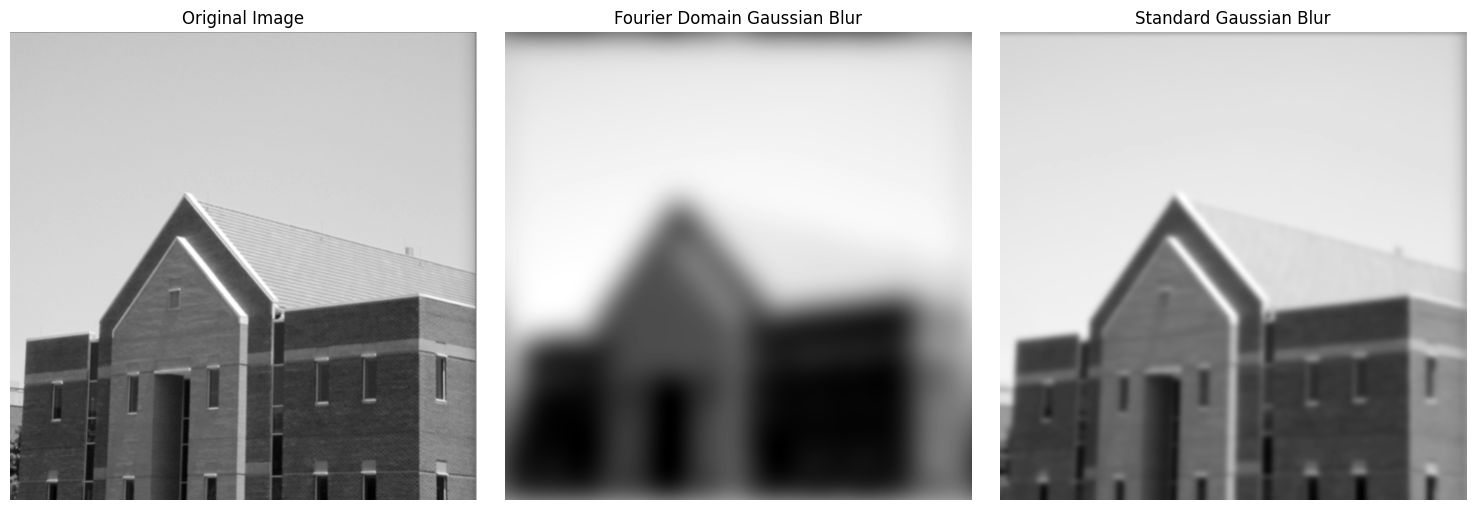

In [ ]:
def gaussian_blur_fourier(image, sigma=5):

    # Create Gaussian filter in frequency domain
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2

    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    gaussian = np.exp(-(X**2 + Y**2)/(2*sigma**2))

    # Apply filter in frequency domain
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    f_shift_filtered = f_shift * gaussian
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    img_blurred = np.abs(np.fft.ifft2(f_ishift))

    # Compare with standard Gaussian blur
    img_standard_blur = cv2.GaussianBlur(image, (0, 0), sigma)

    return img_blurred, img_standard_blur

fourier_blur, standard_blur = gaussian_blur_fourier(original_image)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(fourier_blur, cmap='gray')
plt.title('Fourier Domain Gaussian Blur')
plt.axis('off')

plt.subplot(133)
plt.imshow(standard_blur, cmap='gray')
plt.title('Standard Gaussian Blur')
plt.axis('off')

plt.tight_layout()
plt.show()

## (c) DCT Scaling

Implement image scaling using the Discrete Cosine Transform.

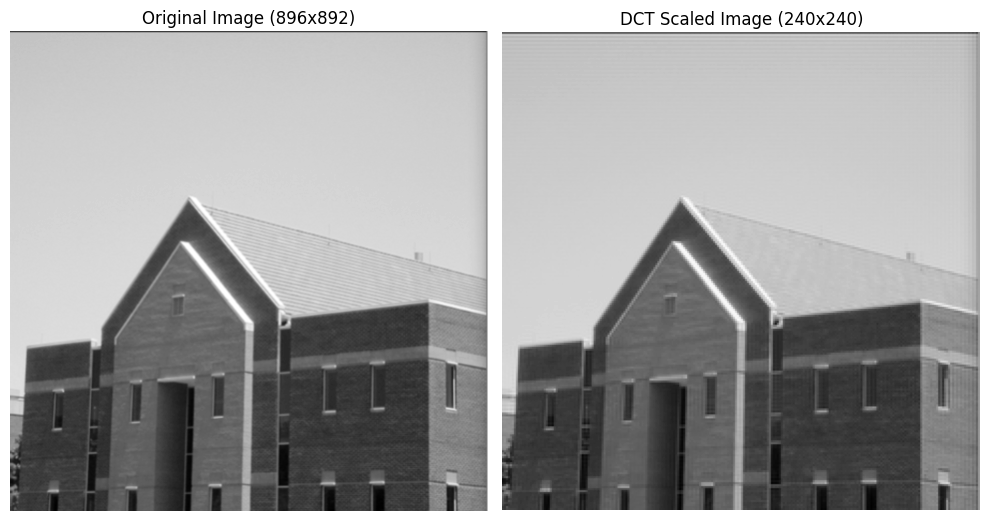

In [ ]:
def dct_scaling(image, target_size=(240, 240)):

    # Apply 2D DCT
    dct_image = dct(dct(image.T, norm='ortho').T, norm='ortho')

    # Keep only coefficients needed for target size
    rows, cols = target_size
    dct_scaled = dct_image[:rows, :cols]

    # Apply inverse DCT
    scaled_image = idct(idct(dct_scaled.T, norm='ortho').T, norm='ortho')

    return scaled_image

dct_scaled = dct_scaling(original_image)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(original_image, cmap='gray')
plt.title(f'Original Image ({original_image.shape[0]}x{original_image.shape[1]})')
plt.axis('off')

plt.subplot(122)
plt.imshow(dct_scaled, cmap='gray')
plt.title(f'DCT Scaled Image ({dct_scaled.shape[0]}x{dct_scaled.shape[1]})')
plt.axis('off')

plt.tight_layout()
plt.show()

## (d) Compression Artifacts

Demonstrate common compression artifacts (ringing and blocking) that occur with DCT-based compression.

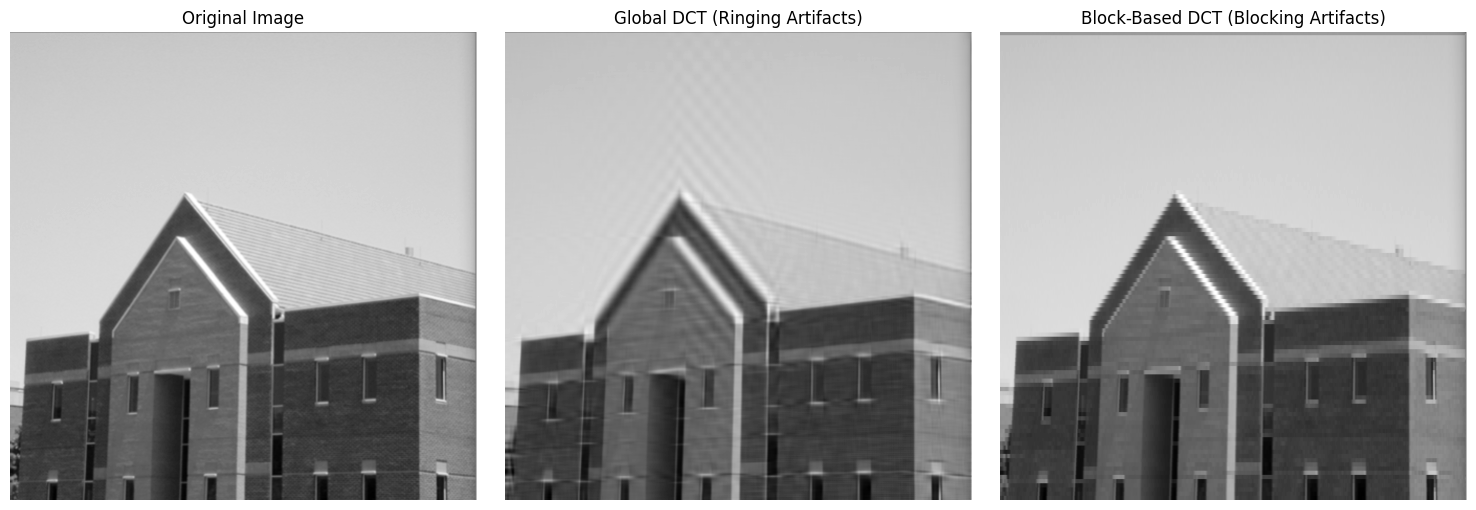

In [ ]:
def global_dct_compression(image, retain_size=40):
    dct_coeffs = dct(dct(image.T, norm='ortho').T, norm='ortho')
    compressed_dct = dct_coeffs.copy()
    compressed_dct[retain_size:, retain_size:] = 0
    return idct(idct(compressed_dct.T, norm='ortho').T, norm='ortho')

def block_dct_compression(image, block_size=8, quality=100):
    def process_block(block):
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')

        if quality < 100:
            quantization_threshold = int((block_size ** 2) * (100 - quality) / 100)
            dct_block.flat[quantization_threshold:] = 0
        else:
            quantization_threshold = int(block_size * block_size * 0.1)
            dct_block.flat[quantization_threshold:] = 0

        return idct(idct(dct_block.T, norm='ortho').T, norm='ortho')

    height, width = image.shape
    compressed_image = np.zeros_like(image)

    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image[i:i + block_size, j:j + block_size]
            processed_block = process_block(block)
            compressed_image[i:i + processed_block.shape[0], j:j + processed_block.shape[1]] = processed_block

    return np.clip(compressed_image, 0, 255)


compressed_global = global_dct_compression(original_image, retain_size=40)
compressed_block = block_dct_compression(original_image, block_size=8, quality=100)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(compressed_global, cmap='gray')
plt.title("Global DCT (Ringing Artifacts)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(compressed_block, cmap='gray')
plt.title("Block-Based DCT (Blocking Artifacts)")
plt.axis("off")

plt.tight_layout()
plt.show()

### Explanation of Compression Artifacts

In the compressed image above, we can observe two main types of artifacts:

1. **Blocking Artifacts:**
   
    - Description: These appear as visible grid patterns or discontinuities at the boundaries of 8×8 blocks.
    - Cause: They result from the independent processing of non-overlapping blocks during block-based DCT compression.
    - Visibility: Blocking artifacts are particularly noticeable in smooth or gradually transitioning areas of the image, where continuity is expected.

2. **Ringing Artifacts:**
   - Description: These appear as oscillatory patterns or "halo" effects near sharp edges or high-contrast transitions.
   - Cause: They are caused by the global DCT compression, which involves truncating high-frequency DCT coefficients, leading to inaccuracies in reconstructing sharp edges.
   - Visibility: Ringing artifacts become more apparent in areas with abrupt changes in intensity, such as edges.

Both types of artifacts become more prominent as compression ratios increase (e.g., smaller retain_size or lower quality values).